 Netflix Movies and TV Shows Clustering

In [1]:
import numpy as np
from scipy.stats import norm
import pandas as pd

# For plotting statstical visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Updating nltk library
import nltk
nltk.download('stopwords')
nltk.download('punkt')


# Importing stopwords from nltk library
from nltk.corpus import stopwords

# Import punctuations
import string

# Import regex library
import re

# Import BeautifulSoup library
from bs4 import BeautifulSoup

# For stemming to corpus
from nltk.stem.porter import PorterStemmer

# For corpus lemmatization
from nltk.stem import WordNetLemmatizer

# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# For pretty-printing tabular data
from tabulate import tabulate

# KElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from yellowbrick.cluster.elbow import kelbow_visualizer

# Importing clustering Evaluation metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Install yellowbrick library


# For Cross-Validation and Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Importing algorithams for building model
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.decomposition import LatentDirichletAllocation

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vicky\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vicky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
file_path = r"C:\Users\vicky\Downloads\NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv"

In [3]:
# Loading Dataset
df = pd.read_csv(file_path)

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


Data Inispection

In [5]:
df.shape

(7787, 12)

In [6]:
# Basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [7]:
# Basic description of Dataset of all numerical variables
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [8]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
# Basic description of Dataset of all categorical variables
df.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1547,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,2863,1608,334,3


Movies are more widely available on Netflix than TV shows. 
Most of the movies and TV shows are produced in the United States.
Documentaries are available in the majority of movies and TV shows on Netflix.

In [10]:
# Checking duplicated values in dataset
count_duplicated = df.duplicated().sum()
print(f'Dataset having {count_duplicated} duplicated values')

Dataset having 0 duplicated values


In [11]:
# Checking for number of null values in dataset
count_null_df=pd.DataFrame({'columns':df.columns,'number_of_nulls_values':df.isna().sum()})
count_null_df.set_index('columns').sort_values(by='number_of_nulls_values', ascending = False)

,number_of_nulls_values
columns,
director,2389
cast,718
country,507
date_added,10
rating,7
show_id,0
type,0
title,0
release_year,0


Understanding Variables

In [12]:
# Finding Categorical variables
categorical_variables=[var for var in df.describe(include='object')]
print(f'Dataset having {len(categorical_variables)} categorical variables')
print('~~'*45)
print(categorical_variables)

Dataset having 11 categorical variables
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in', 'description']


In [13]:
# Finding numerical variables
numerical_variables=[var for var in df.columns if var not in categorical_variables]
print(f'Dataset having {len(numerical_variables)} numerical variables')
print('~~'*45)
print(numerical_variables)

Dataset having 1 numerical variables
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
['release_year']


In [14]:
# Unique Values and its frequency for each variable
for var in df.columns:
    print(f'Feature Name : {var}\n')
    category=df[var].value_counts()
    print(category)
    print('~~'*45)

Feature Name : show_id

show_id
s1       1
s5172    1
s5200    1
s5199    1
s5198    1
        ..
s2592    1
s2591    1
s2590    1
s2589    1
s7787    1
Name: count, Length: 7787, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Feature Name : type

type
Movie      5377
TV Show    2410
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Feature Name : title

title
3%                                          1
Results                                     1
Rich in Love                                1
Ricardo Quevedo: Los amargados somos más    1
Ricardo Quevedo: Hay gente así              1
                                           ..
Hamza's Suitcase                            1
Hamid                                       1
Hamburger Hill                              1
Hamara Dil Aapke Paas Hai                   1
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     1
Name: c

Data Wrangling and Feature Engineering

In [15]:
# Checking duplicated values in dataset
count_duplicated = df.duplicated().sum()
print(f'Dataset having {count_duplicated} duplicated values')

Dataset having 0 duplicated values


In [16]:
# Checking for number of null values
null_df=pd.DataFrame({'columns':df.columns,'number_of_nulls_values':df.isna().sum(),'percentage_null_values':round(df.isna().sum()*100/len(df),2)})
null_df.set_index('columns').sort_values(by='percentage_null_values', ascending = False)

,number_of_nulls_values,percentage_null_values
columns,,
director,2389,30.68
cast,718,9.22
country,507,6.51
date_added,10,0.13
rating,7,0.09
show_id,0,0.00
type,0,0.00
title,0,0.00
release_year,0,0.00


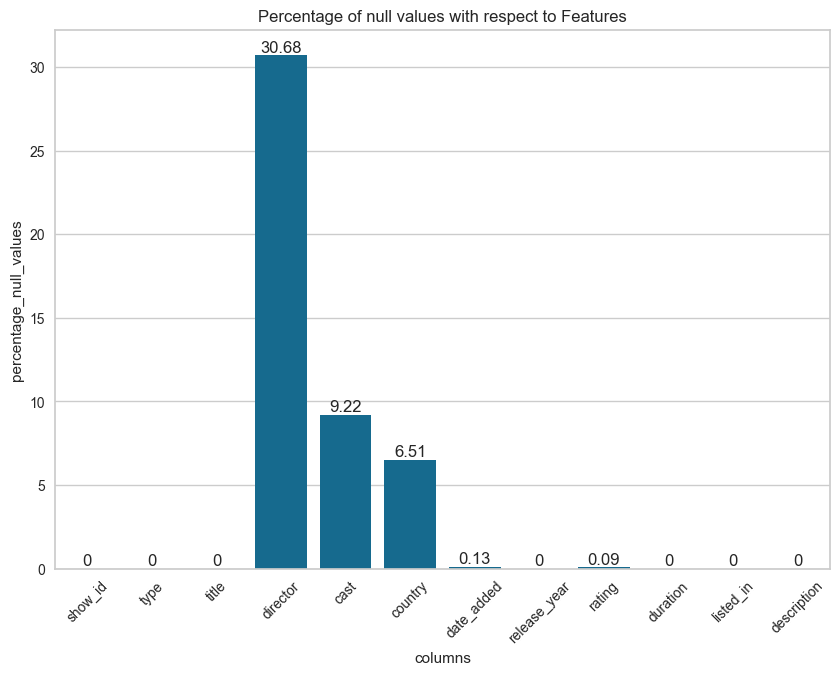

In [17]:
# Ploting number of null values with its variable
plt.figure(figsize=(10,7))
ax=sns.barplot(x='columns', y='percentage_null_values', data=null_df)
ax.bar_label(ax.containers[0])
plt.title('Percentage of null values with respect to Features')
plt.xticks(rotation= 45)
plt.show()

Director, cast, country, date_added, and rating have null values in 30.68%, 9.22%, 6.51%, 0.13%, and 0.09% of their respective features. 

Text(0.5, 1.0, 'Missing values in the dataset with respect to its features')

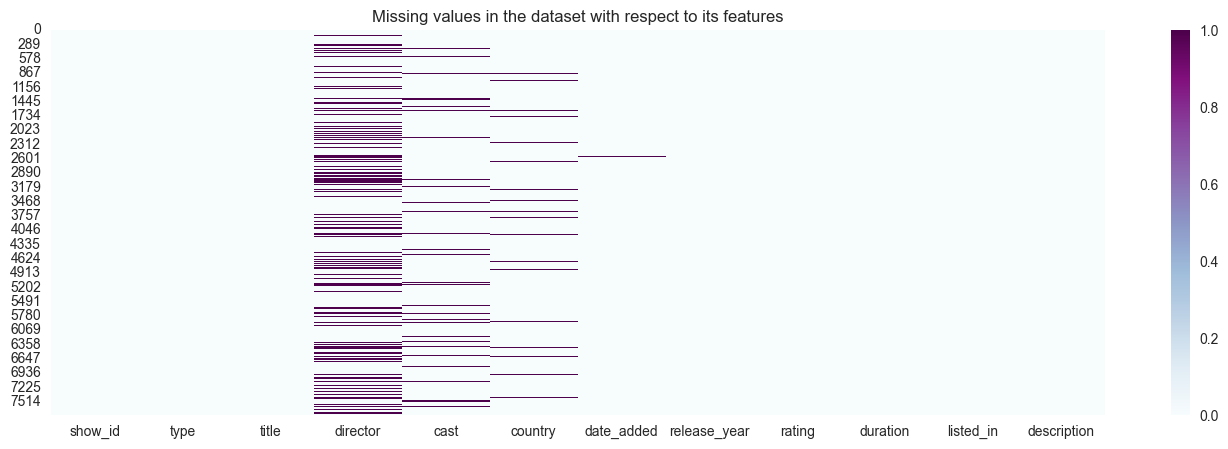

In [18]:
# Vizualizing the null values from the dataset
plt.figure(figsize=(17,5))
sns.heatmap(df.isnull(),cbar=True, cmap='BuPu')
plt.title('Missing values in the dataset with respect to its features')

In [19]:
#checking category of features whoes having null values

# Defining target variables
null_variables=['director','cast','country','date_added','rating']
# Checking categories in each target feature
for var in null_variables:
    print(df[var].value_counts())
    print('~~'*45)

director
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
                          ..
Vibhu Virender Puri        1
Lucien Jean-Baptiste       1
Jason Krawczyk             1
Quinn Lasher               1
Sam Dunn                   1
Name: count, Length: 4049, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cast
David Attenborough                                                                                                                                                            18
Samuel West                                                                                                                                                                   10
Jeff Dunham                                                                                                                                                                    7
Kevin

In [20]:
## Handling null values

# Filling null values of features director, cast and country
df.director.fillna("Director Unavailable",inplace=True)
df.cast.fillna("Cast Unavailable",inplace=True)
df.country.fillna("Country Unavailable",inplace=True)

# Dropping null values from date_added and rating columns
df.dropna(subset=["date_added",'rating'],inplace=True)

# Handling Outliers

__________________________________________________________________________________________


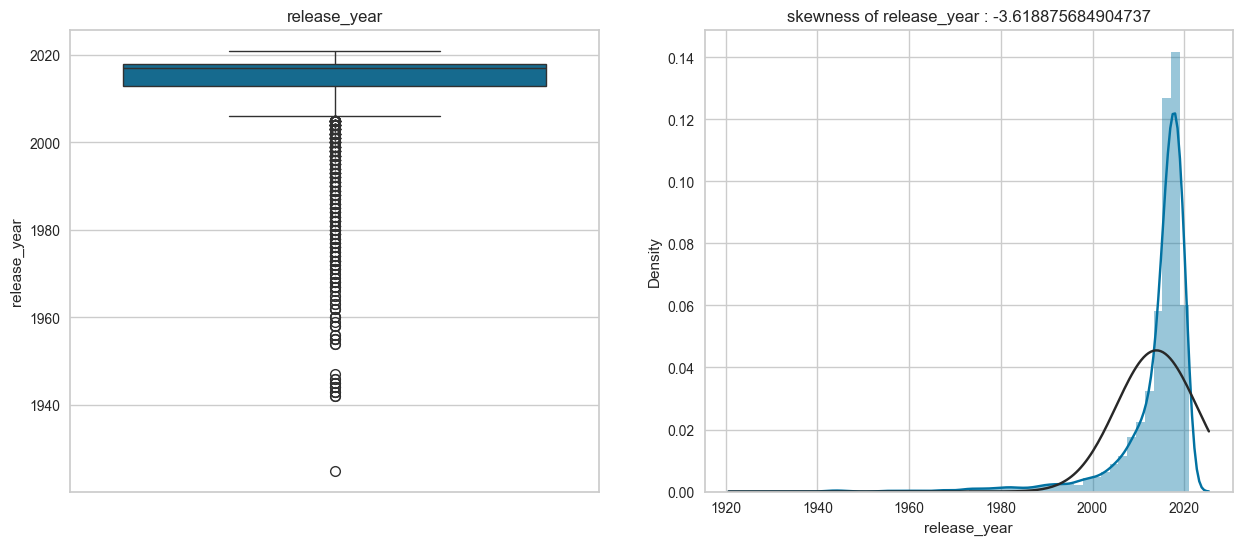

__________________________________________________________________________________________


In [21]:
# Checking for outliers in numerical variables using boxplot

# Importing library for checking normality in distribution
from scipy.stats import norm

# Plotting Box and Distribution plot using for loop
for var in numerical_variables:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(df[var], fit=norm)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*45)
    plt.show()
    print('__'*45)

In [22]:
# Using Inter Quartile Range for removing outliers from numerical variables

# Capping dataset
for i in numerical_variables:
    # Findling IQR
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    
    # Defining upper and lower limit
    lower_limit =df[i].quantile(0.25)-1.5*IQR
    upper_limit =df[i].quantile(0.75)+1.5*IQR
    
    # Applying lower and upper limit to each variables
    df.loc[(df[i] > upper_limit),i] = upper_limit
    df.loc[(df[i] < lower_limit),i] = lower_limit

__________________________________________________________________________________________


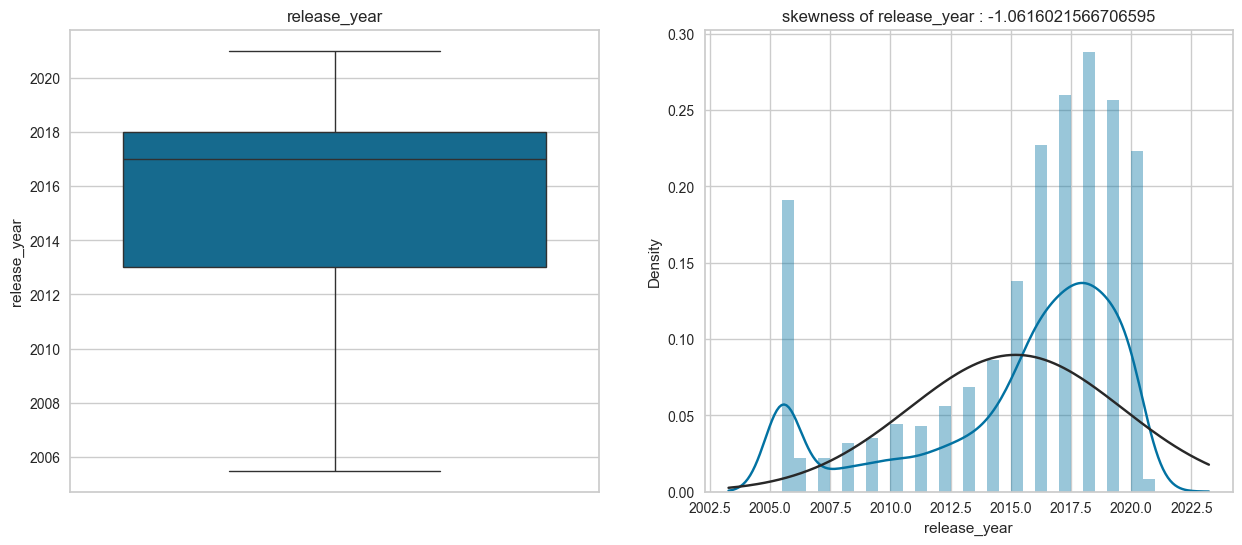

__________________________________________________________________________________________


In [23]:
# Using boxplot checking outliers in features after removed using IQR

for var in numerical_variables:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(df[var], fit=norm)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*45)
    plt.show()
    print('__'*45)

# Feature Engineering

In [24]:
# Ensure that features are in the correct data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       7770 non-null   object 
 1   type          7770 non-null   object 
 2   title         7770 non-null   object 
 3   director      7770 non-null   object 
 4   cast          7770 non-null   object 
 5   country       7770 non-null   object 
 6   date_added    7770 non-null   object 
 7   release_year  7770 non-null   float64
 8   rating        7770 non-null   object 
 9   duration      7770 non-null   object 
 10  listed_in     7770 non-null   object 
 11  description   7770 non-null   object 
dtypes: float64(1), object(11)
memory usage: 789.1+ KB


# Exploratory data analysis

In [26]:
# Creating new dataframe having all TV shows
tv_shows_df = df[df.type=='TV Show']
tv_shows_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020.0,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016.0,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,Director Unavailable,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,Cast Unavailable,Mexico,"May 17, 2019",2019.0,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,Director Unavailable,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",Country Unavailable,"March 20, 2019",2018.0,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."


In [27]:
# Creating new dataframe having all movies
movies_df = df[df.type == 'Movie']
movies_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016.0,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011.0,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


# Univariate Analysis

In [28]:
# Defining r to autofit the number and size of plots
r = int(len(df.columns))

In [29]:
# Defining a function to Notate the percent count of each value on the bars
def annot_percent(axes):
    '''Takes axes as input and labels the percent count of each bar in a countplot'''
    for p in plot.patches:
        total = sum(p.get_height() for p in plot.patches)/100
        percent = round((p.get_height()/total),2)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

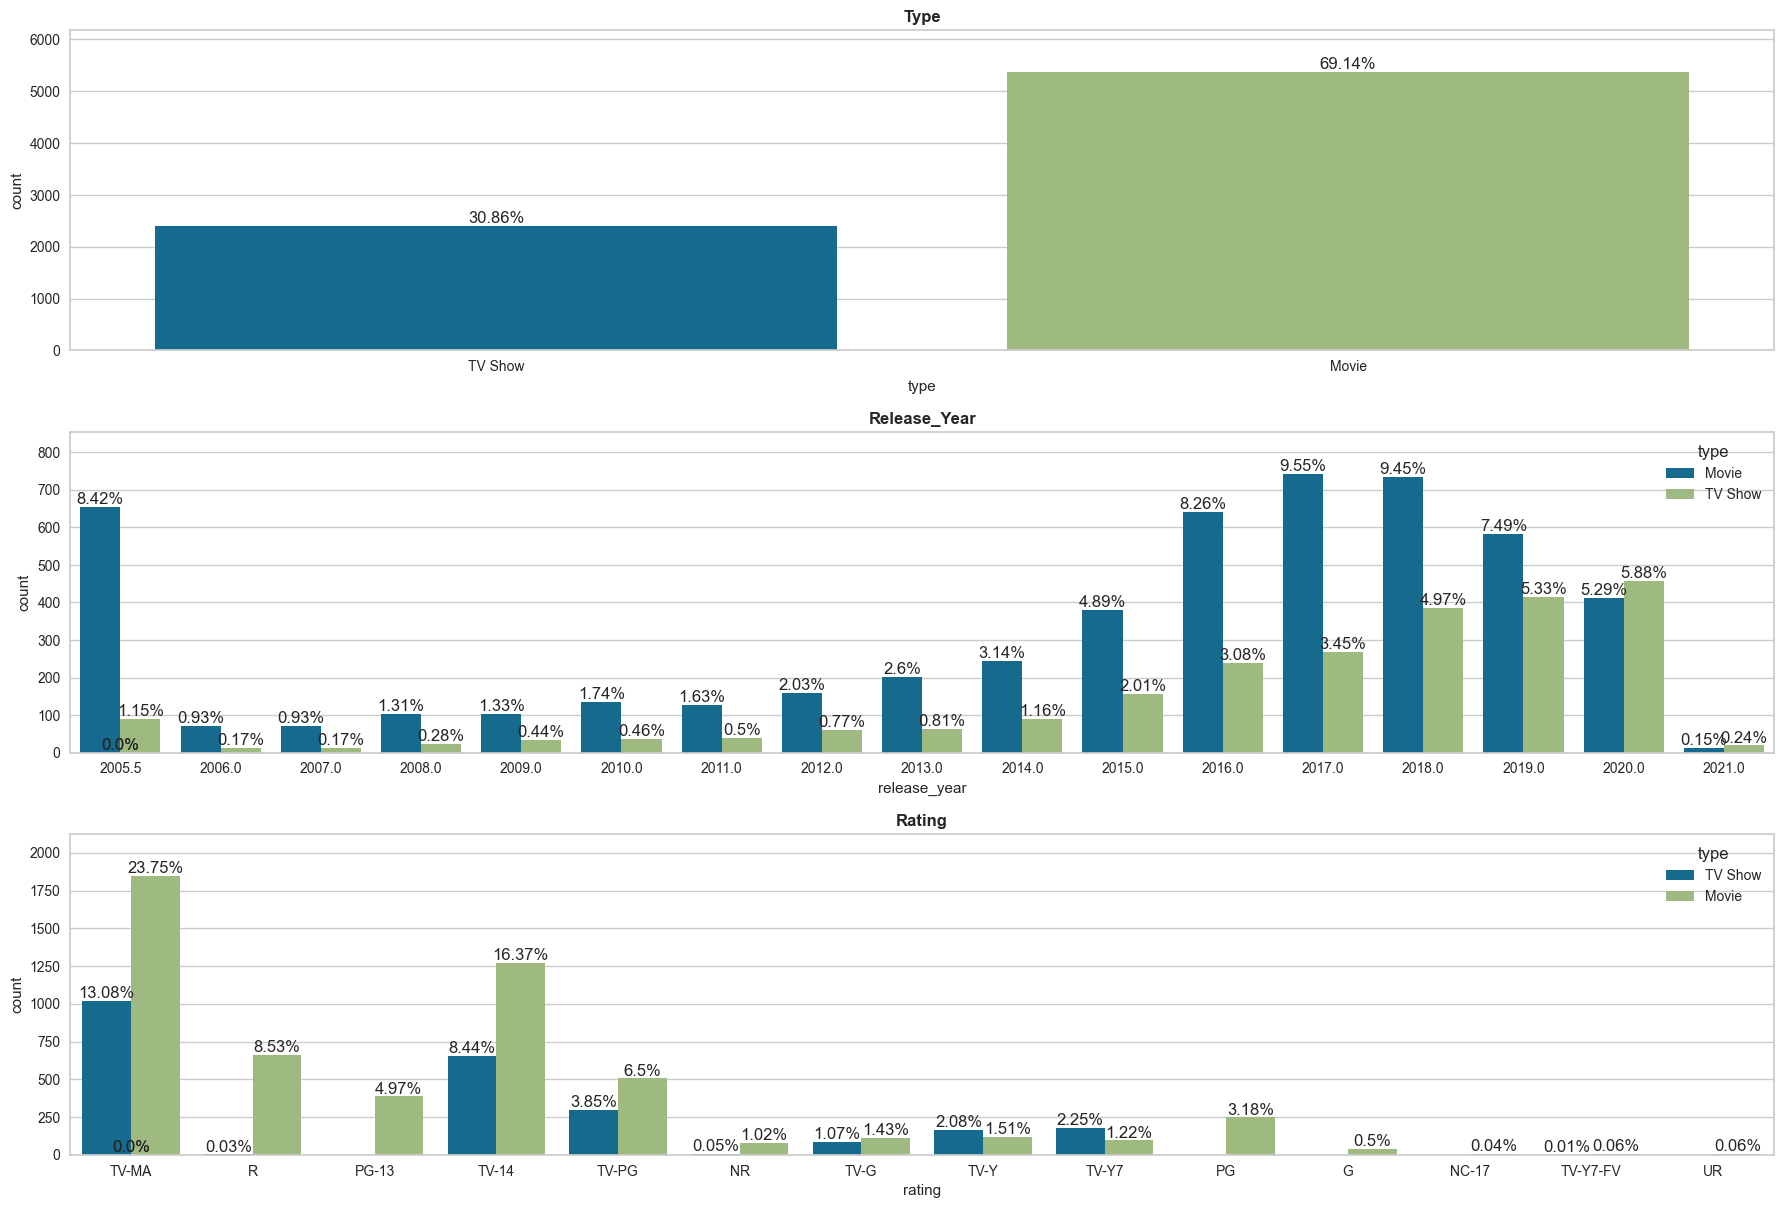

In [30]:
# Plotting the countplots for each variable in target_variables

# Obtaing target variables having maximum 20 categories in features
target_var=[var for var in df.columns if len(df[var].value_counts()) < 20]

plt.figure(figsize=(18,r*4))
for n,var in enumerate(target_var):
    plot = plt.subplot(r,1,n+1)
    ax=sns.countplot(x=df[var], hue=df['type']).margins(y=0.15)
    plt.title(f'{var.title()}',weight='bold')
    plt.tight_layout()
    annot_percent(plot)

Observations :
More movies (69.14%) than TV shows (30.86%) are available on Netflix.
The majority of Netflix movies were released between 2015 and 2020, and the majority of Netflix TV shows were released between 2018 and 2020.
The most movies and TV shows were released for public viewing on Netflix in 2017 and 2020, respectively, out of all released years.
From 2006 to 2019 Netflix is constantly releasing more new movies than TV shows, but in 2020, it released more TV shows than new movies, indicating that Netflix has been increasingly focusing on TV rather than movies in recent years.
More TV shows will be released for public viewing in 2020 and 2021 than at any other time in the history of Netflix.
The majority of TV shows and movies available on Netflix have a TV-MA rating, with a TV-14 rating coming in second.
The majority of movies added to Netflix in 2019 and the majority of TV shows added to Netflix in 2020.
In 2019, Netflix added nearly one-fourth (27.71%) of all content (TV shows and movies).
The majority of the content added to Netflix was in October and January, respectively, but almost all months throughout the year saw Netflix adding content to its platform.

# Bivariate Analysis

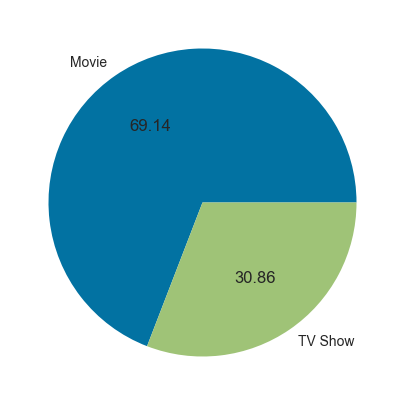

In [31]:
## Number of Movies and TV shows available on Netflix

# Defining figure size
plt.figure(figsize=(5,5))

# Declaring data
type_of_content =df.groupby(by='type').size()

# Plotting data
plt.pie(type_of_content,labels=['Movie','TV Show'],autopct='%.2f')

# Displaying chart
plt.show()


<Figure size 500x500 with 0 Axes>

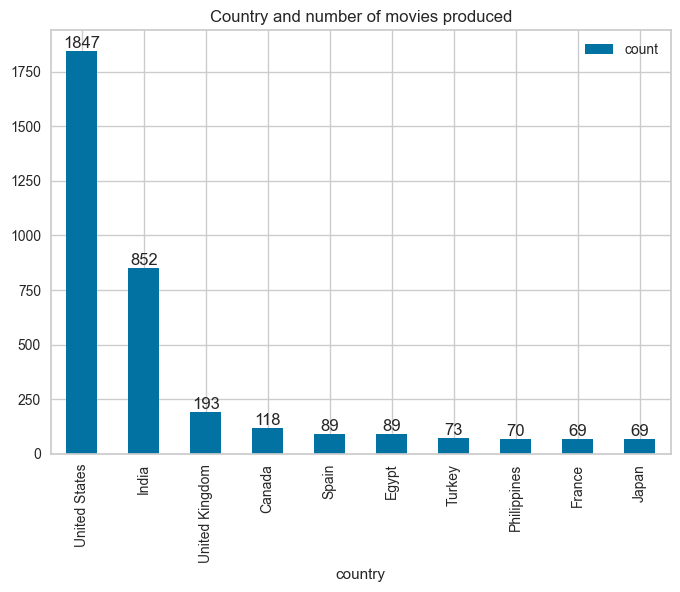

In [32]:
## The country where the majority of movies are produced

# Creating a dataframe for countries where movie are produced and counting them
movie_country_df=pd.DataFrame(movies_df.groupby(by='country').size()).sort_values(by= 0, ascending = False)
movie_country_df.rename(columns={0:'count'}, inplace=True)

# Removing observations where the country is unavailable
movie_country_df=movie_country_df[movie_country_df.index != 'Country Unavailable']

# Defining size of plot
plt.figure(figsize=(5,5))

# Plotting bar graph for top most 10 country
ax=movie_country_df.head(10).plot(kind='bar')

# Assigning labels to the graph
ax.bar_label(ax.containers[0])
plt.title('Country and number of movies produced')

# Displaying plot
plt.show()

<Figure size 500x500 with 0 Axes>

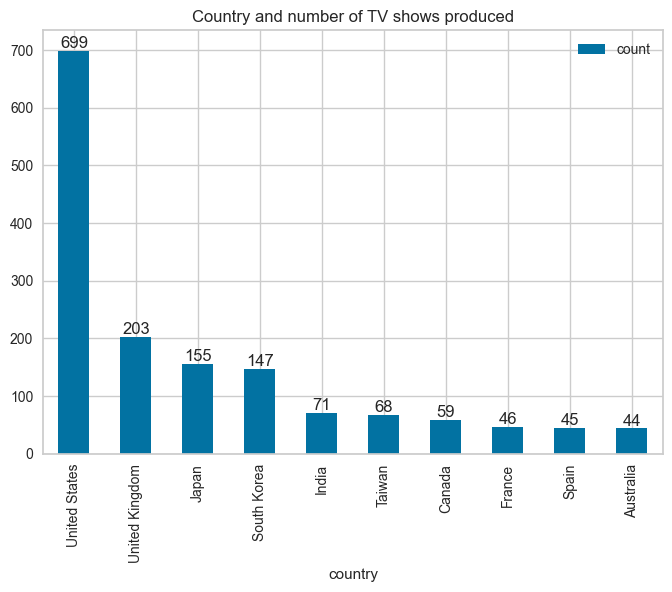

In [33]:
# The country where the majority of TV shows are produced

# Creating a dataframe for countries where TV shows are produced and counting them
tv_show_country_df=pd.DataFrame(tv_shows_df.groupby(by='country').size()).sort_values(by= 0, ascending = False)
tv_show_country_df.rename(columns={0:'count'}, inplace=True)

# Removing observations where the country is unavailable
tv_show_country_df=tv_show_country_df[tv_show_country_df.index != 'Country Unavailable']

# Defining size of plot
plt.figure(figsize=(5,5))

# Plotting bar graph for top most 10 country
ax=tv_show_country_df.head(10).plot(kind='bar')

# Assigning labels to the graph
plt.title('Country and number of TV shows produced')
ax.bar_label(ax.containers[0])

# Displaying plot
plt.show()

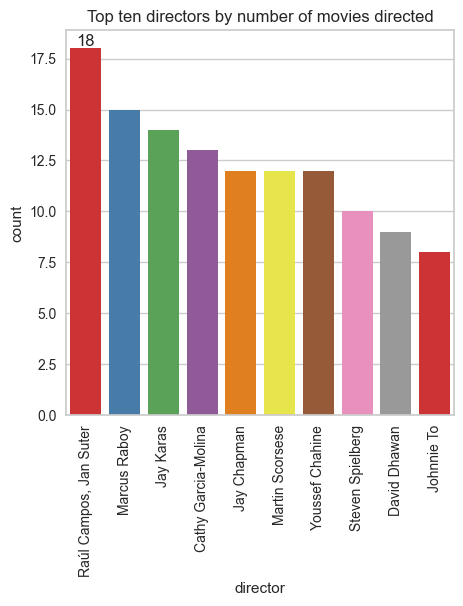

In [34]:
# The directors of the majority of movies

# Removing observations where the director is unavailable
movied_df=movies_df[movies_df['director'] != 'Director Unavailable']

# Defining size of plot
plt.figure(figsize=(5,5))

# Plotting count plot graph for top most 10 directors of movies
ax=sns.countplot(x=movied_df['director'], order=movied_df.director.value_counts().index[:10], palette='Set1')

# Assigning labels to the graph
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Top ten directors by number of movies directed')

# Displaying plot
plt.show()

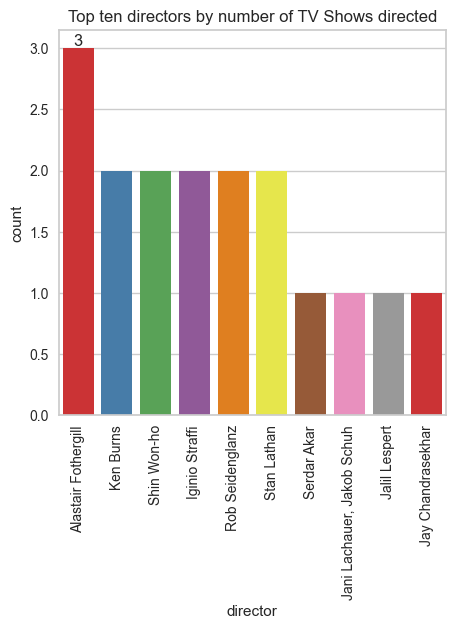

In [35]:
## The directors of the majority of TV Shows

# Removing observations where the director is unavailable
tv_shows_df=tv_shows_df[tv_shows_df['director'] != 'Director Unavailable']

# Defining size of plot
plt.figure(figsize=(5,5))

# Plotting count plot graph for top most 10 directors of TV Shows
ax=sns.countplot(x=tv_shows_df['director'], order=tv_shows_df.director.value_counts().index[:10],palette='Set1')

# Assigning labels to the graph
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Top ten directors by number of TV Shows directed')

# Displaying plot
plt.show()

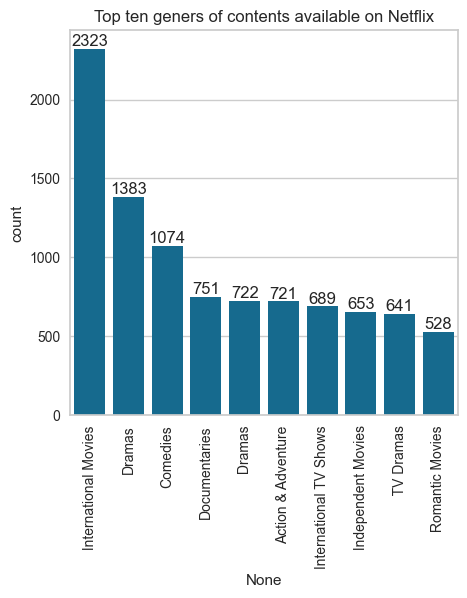

In [36]:
## Netflix's Most Popular Content Genres

# Creating a dataframe for geners
geners_df=df.listed_in.str.split(',', expand=True).unstack()

# Defining size of plot
plt.figure(figsize=(5,5))

# Plotting count plot graph for top most 10 geners of content available on Netflix
ax=sns.countplot(x=geners_df, order=geners_df.value_counts().index[:10])

# Assigning labels to the graph
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Top ten geners of contents available on Netflix')

# Displaying plot
plt.show()

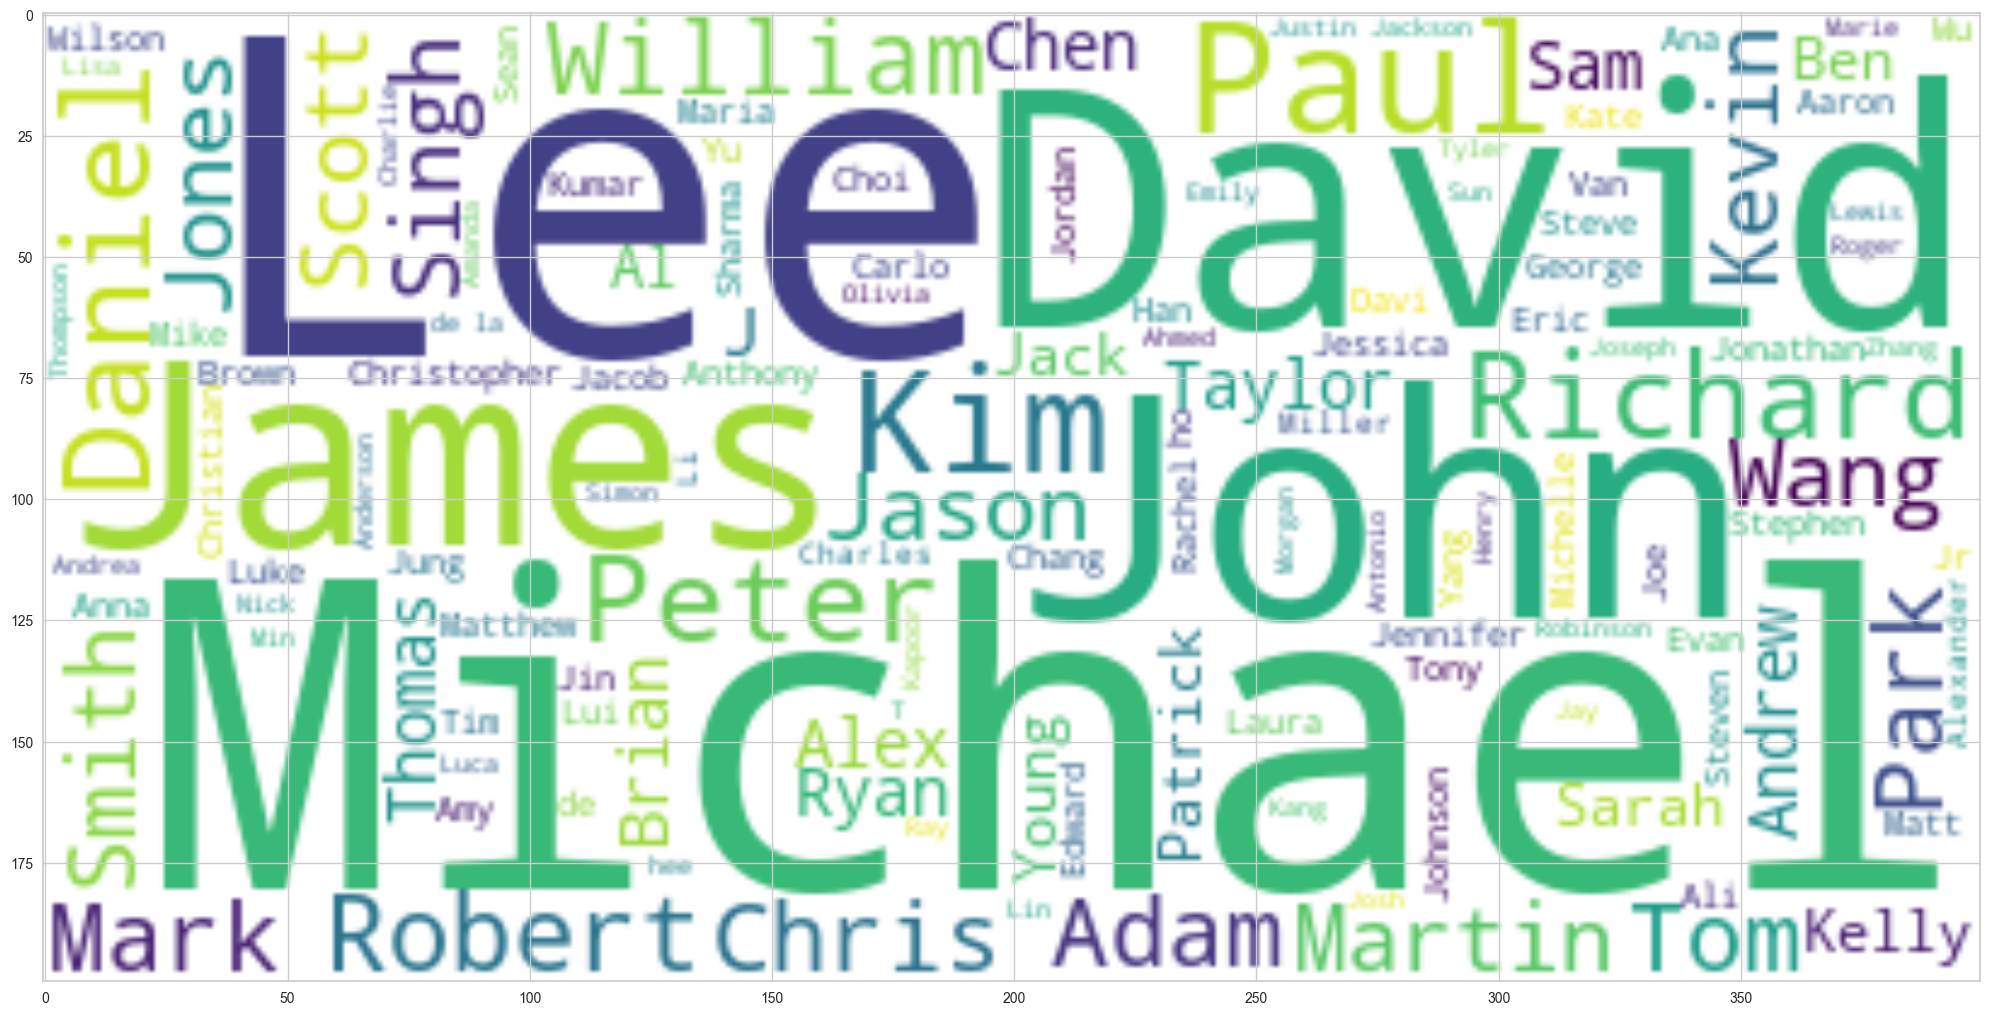

In [37]:
# Wordcloud for actors involved in movies and TV Shows available on Netflix

# Import worldcloud library
from wordcloud import WordCloud

# Defining size of plot
plt.subplots(figsize=(25,15))

# Removing observations where the cast is unavailable
cast_df=df[df['cast'] != 'Cast Unavailable']

# Generate a word cloud image
wordcloud = WordCloud(background_color='white').generate(','.join(cast_df.cast))

# Ploting graph
plt.imshow(wordcloud, interpolation="bilinear")

# Displaying plot
plt.show()

Observations :
Netflix has more movies (69.14%) than TV shows (30.86%).
The majority of movies available on Netflix are produced in the United States, with India coming in second.
The United States and the United Kingdom are the two countries that produced the most of the TV shows that are available on Netflix.
Raul Campos and Jan Suter directed most of the movies available on Netflix for public viewing.
Alastair Fothergill directed most of the TV shows available on Netflix for public viewing.
International movies and the second-most popular dramas are available on Netflix as content.
Actors who have appeared in films and TV shows that are most available on Netflix are Lee, Michel, David, Jhon, and James.

# Multivariate Analysis

ValueError: could not convert string to float: 's1'

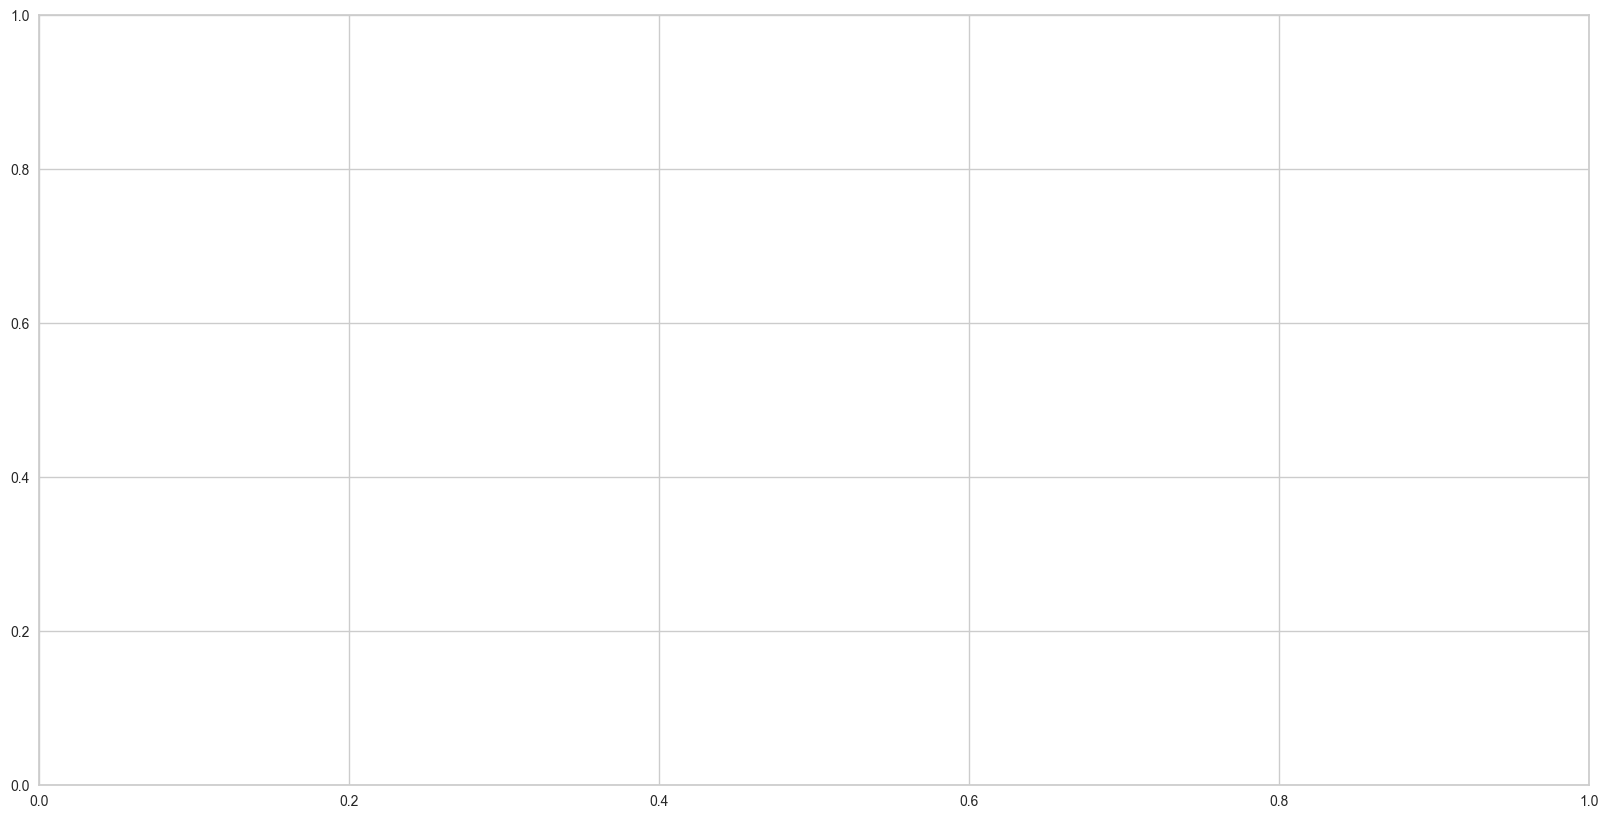

In [38]:
# Examining the heatmap and correlation matrix to determine the relationship between the variables
fig, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(df.corr(),ax = ax, annot=True, cmap='BuPu', linewidths=0.5)
plt.show()

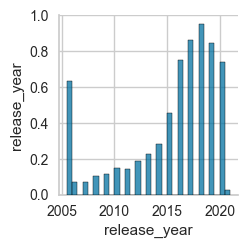

In [39]:
# Pair Plot visualization code
sns.pairplot(df, palette="husl")
plt.show()

# Data Pre-processing

In [40]:
## Creating new feature having length of words of description variable 
df['description_len'] = df['description'].apply(lambda x: len(x.split()))
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,description_len
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020.0,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,26
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016.0,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,24
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011.0,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",24
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009.0,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",23
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008.0,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,22


 Expand Contraction
 
  Contractions are words or combinations of words that are shortened by dropping letters and replacing them by an apostrophe. Removing contractions contributes to text standardisation because words play an important role in NLP.

In [41]:
# import contractions library
import contractions

def contraction_process(corpus):
    '''Function which expands contractions from the corpus
    Args:
    corpus (string): corpus to which function is to be applied
    Returns:
    corpus with expanded contractions
    '''
    corpus = contractions.fix(corpus)
    return corpus

# Apply the contraction_process function to each examples in description variable
df['contractions_description']=df['description'].apply(contraction_process)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,description_len,contractions_description
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020.0,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,26,In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016.0,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,24,After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011.0,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",24,"When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009.0,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",23,"In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008.0,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,22,A brilliant group of students become card-coun...


In [42]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vicky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vicky\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vicky\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [43]:
# Importing stopwords from nltk library
from nltk.corpus import stopwords
# Extracting the English stopwords from nltk library
stopwords = stopwords.words('english')
# Displaying the English stopwords
np.array(stopwords)

array(['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all',
       'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at',
       'be', 'because', 'been', 'before', 'being', 'below', 'between',
       'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did',
       'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don',
       "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further',
       'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven',
       "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers',
       'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd",
       'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it',
       "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll',
       'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn',
       "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not',
       'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'ot

In [44]:
# Length of English stopwords
print("Number of English stopwords : ", len(stopwords))

Number of English stopwords :  198


In [45]:
# Import punctuations
import string
# Extracting punctuations
punctuations = string.punctuation
# Displaying the punctuations
punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [46]:
# Creating new variable punctuation_% contain percentage of punctuations in each corpus
import string

def punctuation_count(txt):
    count = sum([1 for c in txt if c in punctuations])
    return 100*count/len(txt)

# Apply function to contractions_description variable
df['punctuation_%'] = df['contractions_description'].apply(lambda x: punctuation_count(x))
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,description_len,contractions_description,punctuation_%
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020.0,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,26,In a future where the elite inhabit an island ...,2.205882
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016.0,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,24,After a devastating earthquake hits Mexico Cit...,1.351351
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011.0,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",24,"When an army recruit is found dead, his fellow...",1.333333
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009.0,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",23,"In a postapocalyptic world, rag-doll robots hi...",2.758621
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008.0,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,22,A brilliant group of students become card-coun...,1.398601


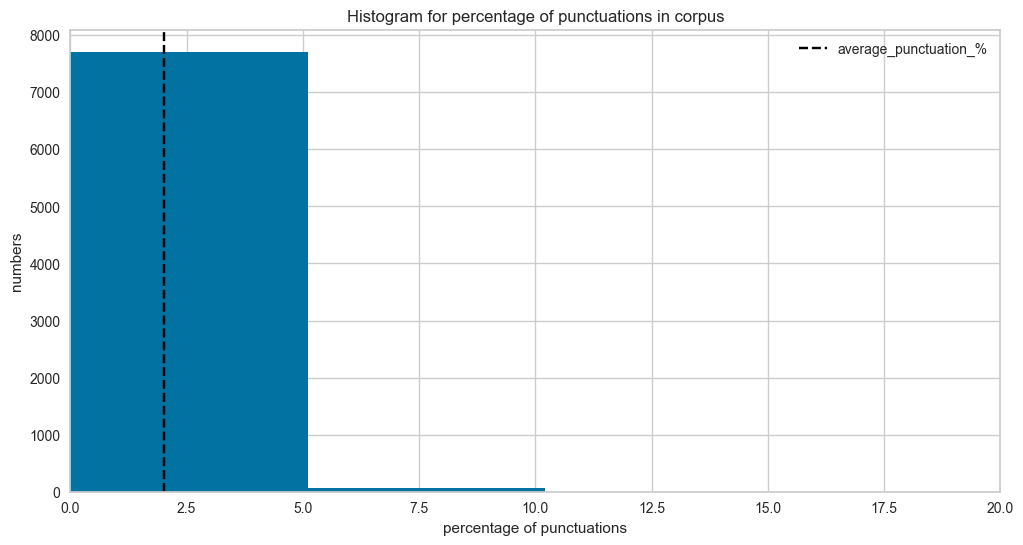

In [47]:
## Histogram for percentage of punctuations in contractions_description variable

# Define size of plot
plt.figure(figsize=(12,6))
bins = np.linspace(0, 250, 50)

# Plot histogram
plt.hist(df['punctuation_%'], bins)
plt.axvline(df['punctuation_%'].mean(), color='black', linestyle='dashed', label='average_punctuation_%')

# Labeling to plot
plt.title('Histogram for percentage of punctuations in corpus')
plt.xlabel('percentage of punctuations')
plt.ylabel('numbers')
plt.legend(loc='best')
plt.xlim(0,20)

# Display plot
plt.show()

In [48]:
def remove_stopwords_punctuations(corpus):
    '''Function which removes stopwords and punctuations and lower casing to the corpus
    Args:
    corpus (string) to which function is to be applied
    Returns:
    lowercase corpus without stopwords and punctuations
    '''
    nopunc =[char for char in corpus if char not in punctuations]
    nopunc=''.join(nopunc)
    return ' '.join([word.lower() for word in nopunc.split() if word.lower() not in stopwords])

# Apply the remove_stopwords_punctuations function to each instance in variable contractions_description
df['no_sw_pun_description']=df['contractions_description'].apply(remove_stopwords_punctuations)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,description_len,contractions_description,punctuation_%,no_sw_pun_description
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020.0,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,26,In a future where the elite inhabit an island ...,2.205882,future elite inhabit island paradise far crowd...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016.0,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,24,After a devastating earthquake hits Mexico Cit...,1.351351,devastating earthquake hits mexico city trappe...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011.0,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",24,"When an army recruit is found dead, his fellow...",1.333333,army recruit found dead fellow soldiers forced...
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009.0,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",23,"In a postapocalyptic world, rag-doll robots hi...",2.758621,postapocalyptic world ragdoll robots hide fear...
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008.0,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,22,A brilliant group of students become card-coun...,1.398601,brilliant group students become cardcounting e...


# Remove URLs

In [49]:
import re

def remove_URL(corpus):
    '''
    Removes URL addresses from a corpus, if present
    Args:
        corpus (string): String to which the function is to be applied
    Returns:
        clean string without URL addresses
    ''' 
    return re.sub(r'https?://\S+|www\.\S+', '', corpus)

# Apply the remove_URL function to each instance in variable no_sw_pun_description
df['clean_description']=df['no_sw_pun_description'].apply(remove_URL)


In [50]:
#  Remove Emails
def remove_emails(corpus):
    '''
    Removes email addresses from a corpus, if present
    Args:
        corpus (string): String to which the function is to be applied
    Returns:
        clean string without email addresses
    ''' 
    corpus_split = corpus.split()
    return ' '.join([i for i in corpus_split if '@' not in i])

# Apply the remove_emails function to each instance in variable clean_description
df['clean_description']=df['clean_description'].apply(remove_emails)


In [51]:
# Removes HTML-Tags
from bs4 import BeautifulSoup

def remove_html_tags(corpus):
    '''
    Removes HTML-Tags from a corpus, if present
    Args:
        text (string): corpus to which the function is to be applied,
    Returns:
        Clean corpus without HTML-Tags
    ''' 
    return BeautifulSoup(corpus, 'html.parser').get_text()

# Apply the remove_html_tags function to each instance in variable clean_description
df['clean_description']=df['clean_description'].apply(remove_html_tags)


In [52]:
# Remove Special Characters
import re

def remove_special_char(corpus):
    """Remove Special Characters from the corpus, if present
    args:
    corpus (string): corpus to which a function is to be applied
    return:
    clean corpus without  special characters
    """
    return re.sub(r"[^a-zA-Z0-9]"," ",corpus)

# Apply the remove_special_char function to each instance in variable clean_description
df['clean_description']=df['clean_description'].apply(remove_special_char)


In [53]:
# Removing Words and Digits Contain Digits
import re


def remove_digits(corpus):
    '''
    Removes digits from a corpus, if present
    Args:
        corpus (string): corpus to which the function is to be applied
    Returns:
        Clean string without digits
    ''' 
    return re.sub('\w*\d\w*','',corpus)

# Apply the remove_digits function to each instance in variable clean_description
df['clean_description']=df['clean_description'].apply(remove_digits)

In [54]:
#  Remove Whitespaces
import re

def remove_extra_whitespaces(corpus):
    '''
    Removes extra whitespaces from a corpus, if present
    Args:
        text (string): corpus to which the function is to be applied
    Returns:
        Clean string without extra whitespaces
    ''' 
    return re.sub(r'^\s*|\s\s*', ' ', corpus).strip()

# Apply the remove_extra_whitespaces function to each instance to variable clean_description
df['clean_description']=df['clean_description'].apply(remove_extra_whitespaces)

In [55]:
# Tokenization

import nltk
nltk.download('punkt')

def tokenization_fun(corpus):
    '''
    Function tokenize corpus
    Args:
        corpus (string): corpus to which the function is to be applied
    Returns:
        tokenised corpus
    '''
    return nltk.word_tokenize(corpus)

# Apply the tokenization_fun function to each instance in variable clean_description
df['tokenized_description']=df['clean_description'].apply(tokenization_fun)
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vicky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,description_len,contractions_description,punctuation_%,no_sw_pun_description,clean_description,tokenized_description
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020.0,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,26,In a future where the elite inhabit an island ...,2.205882,future elite inhabit island paradise far crowd...,future elite inhabit island paradise far crowd...,"[future, elite, inhabit, island, paradise, far..."
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016.0,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,24,After a devastating earthquake hits Mexico Cit...,1.351351,devastating earthquake hits mexico city trappe...,devastating earthquake hits mexico city trappe...,"[devastating, earthquake, hits, mexico, city, ..."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011.0,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",24,"When an army recruit is found dead, his fellow...",1.333333,army recruit found dead fellow soldiers forced...,army recruit found dead fellow soldiers forced...,"[army, recruit, found, dead, fellow, soldiers,..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009.0,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",23,"In a postapocalyptic world, rag-doll robots hi...",2.758621,postapocalyptic world ragdoll robots hide fear...,postapocalyptic world ragdoll robots hide fear...,"[postapocalyptic, world, ragdoll, robots, hide..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008.0,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,22,A brilliant group of students become card-coun...,1.398601,brilliant group students become cardcounting e...,brilliant group students become cardcounting e...,"[brilliant, group, students, become, cardcount..."


# Text Normalization

In [56]:
# Stemming

from nltk.stem.porter import PorterStemmer

# Create object for stemming
porter_stemmer = PorterStemmer()

# Creating function for stemming
def stemming(tokenized_text):
    '''Function which stem each word in token'''
    text = [porter_stemmer.stem(word) for word in tokenized_text]
    return text

In [57]:
# Lemmatization
import nltk
from nltk.stem import WordNetLemmatizer

# Download all nltk corpuses
nltk.download('wordnet')
nltk.download('omw-1.4')

# Create object for lemmatization
lemmatizer = WordNetLemmatizer()

# Creating function for lemmatization
def lemmatization(tokenized_text):
    '''Function which lemmatize each word in token'''
    text = [lemmatizer.lemmatize(word, pos="v") for word in tokenized_text]
    return text

# Apply the lemmatization function to each instance in variable tokenized_description
df['lemmatized_description'] = df['tokenized_description'].apply(lambda x : lemmatization(x))


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vicky\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vicky\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [58]:
# Join all words back together after Text Normalization
df['final_description'] = df['lemmatized_description'].apply(lambda x: ' '.join(x))
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,description_len,contractions_description,punctuation_%,no_sw_pun_description,clean_description,tokenized_description,lemmatized_description,final_description
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020.0,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,26,In a future where the elite inhabit an island ...,2.205882,future elite inhabit island paradise far crowd...,future elite inhabit island paradise far crowd...,"[future, elite, inhabit, island, paradise, far...","[future, elite, inhabit, island, paradise, far...",future elite inhabit island paradise far crowd...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016.0,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,24,After a devastating earthquake hits Mexico Cit...,1.351351,devastating earthquake hits mexico city trappe...,devastating earthquake hits mexico city trappe...,"[devastating, earthquake, hits, mexico, city, ...","[devastate, earthquake, hit, mexico, city, tra...",devastate earthquake hit mexico city trap surv...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011.0,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",24,"When an army recruit is found dead, his fellow...",1.333333,army recruit found dead fellow soldiers forced...,army recruit found dead fellow soldiers forced...,"[army, recruit, found, dead, fellow, soldiers,...","[army, recruit, find, dead, fellow, soldier, f...",army recruit find dead fellow soldier force co...
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009.0,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",23,"In a postapocalyptic world, rag-doll robots hi...",2.758621,postapocalyptic world ragdoll robots hide fear...,postapocalyptic world ragdoll robots hide fear...,"[postapocalyptic, world, ragdoll, robots, hide...","[postapocalyptic, world, ragdoll, robots, hide...",postapocalyptic world ragdoll robots hide fear...
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008.0,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,22,A brilliant group of students become card-coun...,1.398601,brilliant group students become cardcounting e...,brilliant group students become cardcounting e...,"[brilliant, group, students, become, cardcount...","[brilliant, group, students, become, cardcount...",brilliant group students become cardcounting e...


In [59]:
# Creating new feature having length of words of variable final_description after joining back to string 
df['final_description_len'] = df['final_description'].apply(lambda x: len(x.split()))
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,description,description_len,contractions_description,punctuation_%,no_sw_pun_description,clean_description,tokenized_description,lemmatized_description,final_description,final_description_len
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020.0,TV-MA,4 Seasons,...,In a future where the elite inhabit an island ...,26,In a future where the elite inhabit an island ...,2.205882,future elite inhabit island paradise far crowd...,future elite inhabit island paradise far crowd...,"[future, elite, inhabit, island, paradise, far...","[future, elite, inhabit, island, paradise, far...",future elite inhabit island paradise far crowd...,14
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016.0,TV-MA,93 min,...,After a devastating earthquake hits Mexico Cit...,24,After a devastating earthquake hits Mexico Cit...,1.351351,devastating earthquake hits mexico city trappe...,devastating earthquake hits mexico city trappe...,"[devastating, earthquake, hits, mexico, city, ...","[devastate, earthquake, hit, mexico, city, tra...",devastate earthquake hit mexico city trap surv...,15
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011.0,R,78 min,...,"When an army recruit is found dead, his fellow...",24,"When an army recruit is found dead, his fellow...",1.333333,army recruit found dead fellow soldiers forced...,army recruit found dead fellow soldiers forced...,"[army, recruit, found, dead, fellow, soldiers,...","[army, recruit, find, dead, fellow, soldier, f...",army recruit find dead fellow soldier force co...,15
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009.0,PG-13,80 min,...,"In a postapocalyptic world, rag-doll robots hi...",23,"In a postapocalyptic world, rag-doll robots hi...",2.758621,postapocalyptic world ragdoll robots hide fear...,postapocalyptic world ragdoll robots hide fear...,"[postapocalyptic, world, ragdoll, robots, hide...","[postapocalyptic, world, ragdoll, robots, hide...",postapocalyptic world ragdoll robots hide fear...,13
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008.0,PG-13,123 min,...,A brilliant group of students become card-coun...,22,A brilliant group of students become card-coun...,1.398601,brilliant group students become cardcounting e...,brilliant group students become cardcounting e...,"[brilliant, group, students, become, cardcount...","[brilliant, group, students, become, cardcount...",brilliant group students become cardcounting e...,14


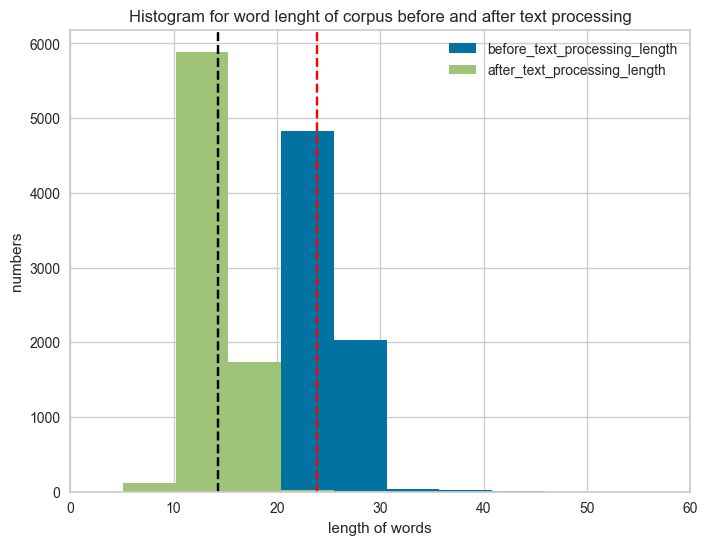

In [60]:
# Histogram for lenght of word before and after text processing

# Define figure size
plt.figure(figsize=(8,6))
bins = np.linspace(0, 250, 50)

# Plot histograms
plt.hist(df['description_len'], bins, label='before_text_processing_length')
plt.hist(df['final_description_len'], bins, label='after_text_processing_length')

# Plot vertically mean
plt.axvline(df['description_len'].mean(), color='red', linestyle='dashed')
plt.axvline(df['final_description_len'].mean(), color='black', linestyle='dashed')

# Labeling plot
plt.title('Histogram for word lenght of corpus before and after text processing')
plt.xlabel('length of words')
plt.ylabel('numbers')
plt.legend(loc='best')
plt.xlim(0,60)

# Display the plot
plt.show()

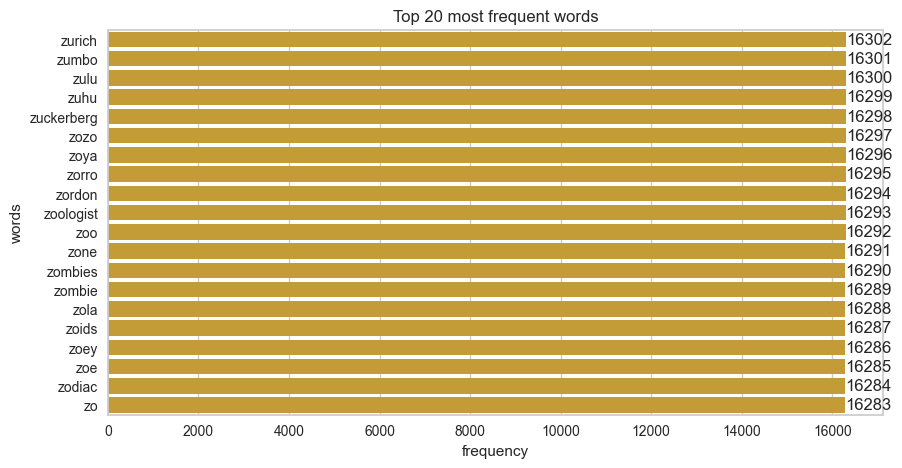

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
X = tfid_vectorizer.fit(df['final_description'])

# Collect the vocabulary items used in the vectorizer
dictionary = X.vocabulary_.items()

## Bar plot of top words after cleaning text

# Lists to store the vocab and counts
vocab = []
count = []

# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)

# Store the count in panadas dataframe with vocab as index
vocab_count_df = pd.Series(count, index=vocab)

# Sort the dataframe
vocab_count_df= vocab_count_df.sort_values(ascending=False)

# Top 20 vocab
top_vacab = vocab_count_df.head(20)

# Plot of the top 20 vocab
plt.figure(figsize=(10,5))
ax=sns.barplot(y=top_vacab.index, x=top_vacab.values, color='goldenrod')
ax.set_title('Top 20 most frequent words')
ax.set_xlabel('frequency')
ax.set_ylabel('words')
ax.bar_label(ax.containers[0])
plt.show()

#  Text Vectorization

In [62]:
# Vetorization
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the object of tfid vectorizer
vectorizer=TfidfVectorizer()

# Fit the vectorizer using the text data
X_tfidf = vectorizer.fit_transform(df['final_description'])

In [63]:
X_array = X_tfidf.toarray()
X_array
X_array.shape

(7770, 16303)

In [64]:
# Store the tf-idf array into pandas dataframe
dataset = pd.DataFrame(X_array, columns = vectorizer.get_feature_names_out())
dataset.head()

,aaliya,aamir,aang,aardman,aaron,abad,abagnale,abah,abandon,abandonment,...,zoologist,zordon,zorro,zoya,zozo,zuckerberg,zuhu,zulu,zumbo,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
# Defining input data to models
X=dataset.values

## ML Model Implementation

In [66]:
from tabulate import tabulate
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def evaluate_clustering_model(model, X , y_predict):
    """
    Evaluate a clustering model and print the results.

    Parameters:
    model (object): A clustering model object.
    X (array): The input data.
    y_predict: Prediction on model.

    Returns:
    Model evaluation result
    """

    # Calculate evaluation metrics
    print('~~'*45)
    print('Evaluation result :\n')
    silhouette = silhouette_score(X, y_predict)
    ch_score = calinski_harabasz_score(X, y_predict)
    db_score = davies_bouldin_score(X, y_predict)

    # Print the results
    print(f"Number of clusters: {len(set(y_predict))}")
    print(f"Silhouette score: {silhouette}")
    print(f"Calinski-Harabasz score: {ch_score}")
    print(f"Davies-Bouldin score: {db_score}")
    print('~~'*45)
    
    # Data 
    metrics = ['Silhouette score', 'Calinski-Harabasz score', 'Davies-Bouldin score']
    ev_result = [silhouette, ch_score, db_score]

    # Create a dataframe
    evaluation_df = pd.DataFrame({'Evaluation Metrics': metrics,
                   'Result': ev_result})
    # Print dataframe
    print(tabulate(evaluation_df, headers='keys', tablefmt='grid'))
    print('\n', '~~'*45, '\n')

    # Create a plot
    # Creating silhouette visualizer
    visualizer = SilhouetteVisualizer(model)
    visualizer.fit(X)    
    visualizer.poof()
    print('~~'*45)
    
    plt.figure(figsize=(7,7))
    ax=sns.barplot(x=evaluation_df['Evaluation Metrics'], y=evaluation_df['Result'])
    ax.bar_label(ax.containers[0])
    ax.set_title("Comparing Evaluation Metrics")
    ax.set_xlabel("Evaluation Metrics")
    ax.set_ylabel("Score")
    ax.legend(loc="best")

    # Show the plot
    plt.show()
    print('~~'*45)
    
    return {'Num_clusters':len(set(y_predict)),'y_predict':y_predict, 'silhouette':silhouette, 'ch_score':ch_score, 'db_score':db_score}

In [67]:
def visualize_clusters(X, y_predict):
    # X is a 2D array of data points
    # y_predict is a 1D array of integer labels indicating which cluster each data point belongs to

    # Create a scatter plot of the data points, colored by their assigned cluster label
    plt.scatter(X[:, 0], X[:, 1], c=y_predict, cmap='rainbow')

    # Show the plot
    plt.show()

# [1] K-Means Clustering

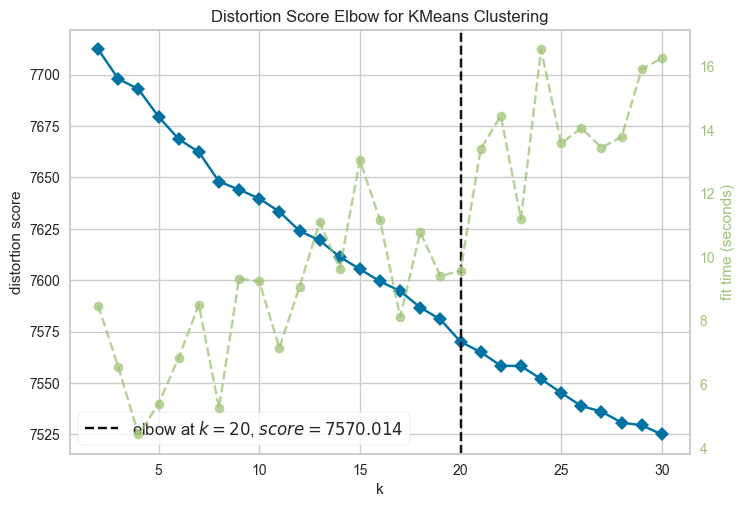

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Elbow Method

# Import from KMeans algoritham and KElbowVisualizer
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer

# Instantiate the clustering model and visualizer
KMeans_model = KMeans(random_state=42)
elb_visualizer = kelbow_visualizer(KMeans_model, X, k=(2,31), locate_elbow=True)

# Display figure
elb_visualizer.show()

# elb_visualizer.poof()


In [ ]:
# Optimal number of cluster
elbow_optimal_K=elb_visualizer.elbow_value_
print(f'Optimal number of cluster using Elbow method : {elbow_optimal_K}')

Optimal number of cluster using Elbow method : 20


# Silhouette Score Method

In [68]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score

num_of_cluster=range(2,31)

for i in num_of_cluster:
    clusterer=KMeans(n_clusters=i)
    preds=clusterer.fit_predict(X)
    centers=clusterer.cluster_centers_
    score=silhouette_score(X, preds)
    print(f"For number of clusters = {i}, silhouette score is {score}")

For number of clusters = 2, silhouette score is 0.0018039320461702962
For number of clusters = 3, silhouette score is 0.0011723501248438828
For number of clusters = 4, silhouette score is 0.0015466321138179696
For number of clusters = 5, silhouette score is 0.0015689178439145558
For number of clusters = 6, silhouette score is 0.0023407724122035635
For number of clusters = 7, silhouette score is 0.002265019126437314
For number of clusters = 8, silhouette score is 0.0028563916913536412
For number of clusters = 9, silhouette score is 0.002899805201588054
For number of clusters = 10, silhouette score is 0.0032262926146533213
For number of clusters = 11, silhouette score is 0.003146293062971905
For number of clusters = 12, silhouette score is 0.003932345660970441
For number of clusters = 13, silhouette score is 0.0035025058360564215
For number of clusters = 14, silhouette score is 0.0038594639555971258
For number of clusters = 15, silhouette score is 0.0036398482325530022
For number of clus

In [69]:
# Optimal number of cluster
silhouette_optimal_K=30
print(f'Optimal number of cluster using the Silhouette Score Method : {silhouette_optimal_K}')

Optimal number of cluster using the Silhouette Score Method : 30


In [70]:
# Training the K-means model on a dataset for number of clusters K=17

from sklearn.cluster import KMeans
# Fitting model
kmeans = KMeans(n_clusters=17, init='k-means++', random_state= 42)
kmeans.fit(X)

KMeans(n_clusters=17, random_state=42)

In [86]:
# Centers of the clusters of the model
kmeans_centers=kmeans.cluster_centers_
kmeans_centers

array([[-4.74338450e-20,  1.21972744e-19,  2.71050543e-20, ...,
        -7.45388994e-20,  9.48676901e-20,  6.09863722e-20],
       [ 5.69206141e-19,  1.18349694e-04, -1.52465931e-18, ...,
         1.24409417e-04,  1.14310923e-04,  1.21645480e-04],
       [-3.38813179e-20,  1.08420217e-19,  2.71050543e-20, ...,
        -4.06575815e-20,  6.09863722e-20,  2.71050543e-20],
       ...,
       [-5.42101086e-20,  1.21972744e-19,  2.71050543e-20, ...,
        -6.77626358e-20,  8.80914265e-20,  5.42101086e-20],
       [-1.35525272e-20,  1.08420217e-19,  1.47444668e-03, ...,
         6.77626358e-21,  2.03287907e-20, -1.35525272e-20],
       [-1.42301535e-19,  1.35525272e-19,  2.71050543e-20, ...,
         1.21972744e-19, -2.71050543e-20, -1.49077799e-19]])

In [71]:
# Predict result
y_predict= kmeans.predict(X)
y_predict

array([13, 16,  1, ...,  9,  1,  9])

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Evaluation result :

Number of clusters: 17
Silhouette score: 0.004121238530784161
Calinski-Harabasz score: 8.138140469672052
Davies-Bouldin score: 11.90644232615603
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
+----+-------------------------+-------------+
|    | Evaluation Metrics      |      Result |
+====+=========================+=============+
|  0 | Silhouette score        |  0.00412124 |
+----+-------------------------+-------------+
|  1 | Calinski-Harabasz score |  8.13814    |
+----+-------------------------+-------------+
|  2 | Davies-Bouldin score    | 11.9064     |
+----+-------------------------+-------------+

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



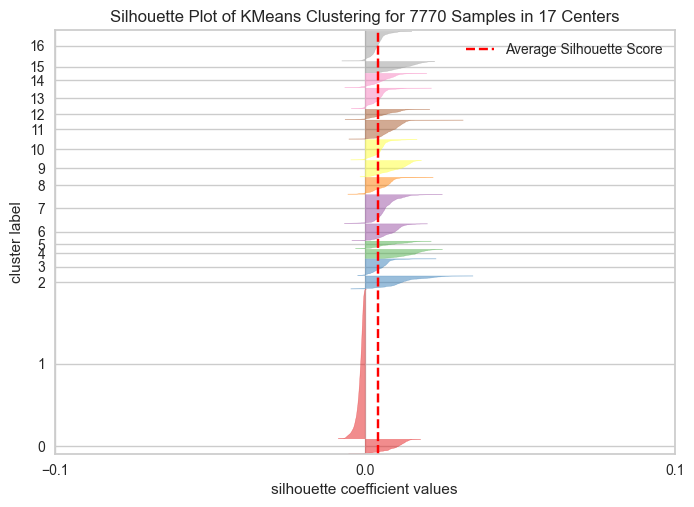

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


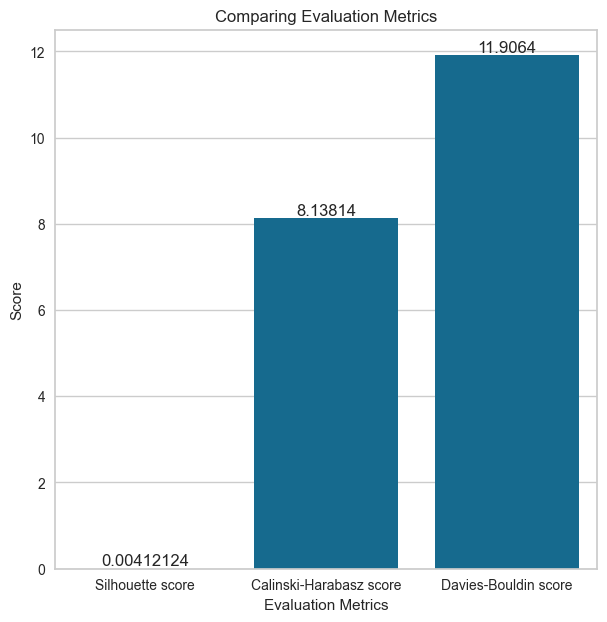

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [72]:
# Evaluation of Model
Kmeans_eval=evaluate_clustering_model(kmeans, X, y_predict)

In [73]:
# Assigne Movies and TV Shows to its cluster


# Copy dataset
kmeans_df=df.copy()

# Droping non original features from dataset
kmeans_df.drop(columns={'description_len','contractions_description', 'punctuation_%', 'no_sw_pun_description',
                        'clean_description', 'tokenized_description', 'lemmatized_description',
                        'final_description', 'final_description_len'}, axis=1, inplace=True)

# Assigne Movies and TV Shows to its cluster
kmeans_df['cluster'] = kmeans.labels_
kmeans_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cluster
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020.0,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,13
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016.0,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,16
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011.0,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009.0,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",8
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008.0,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,8


Text(0, 0.5, 'Number of Movies / TV Shows')

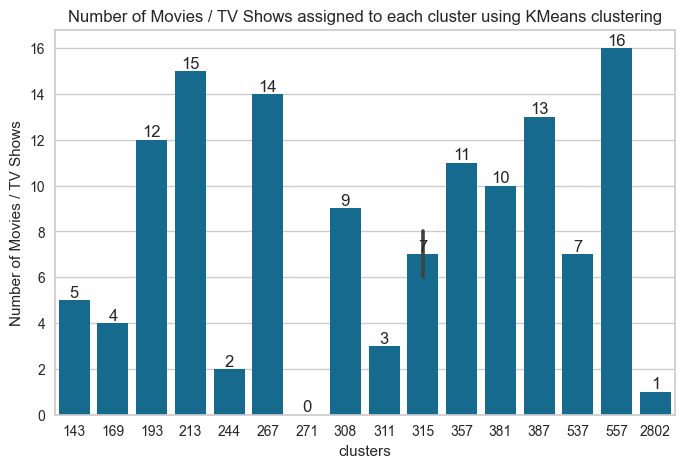

In [100]:
# Finding number of Movies / TV Shows in each cluster

# Creat dataframe for  number of movies/Tv shows in each cluster
num_datapoint_in_clusters=kmeans_df['cluster'].value_counts().reset_index()

# Plotting bar plot
plt.figure(figsize=(8,5))
ax=sns.barplot(x=num_datapoint_in_clusters['count'],y=num_datapoint_in_clusters['cluster'])
ax.bar_label(ax.containers[0])
ax.set_title("Number of Movies / TV Shows assigned to each cluster using KMeans clustering")
ax.set_xlabel("clusters")
ax.set_ylabel("Number of Movies / TV Shows")

# Hierarchical Clustering
# Dendogram Method

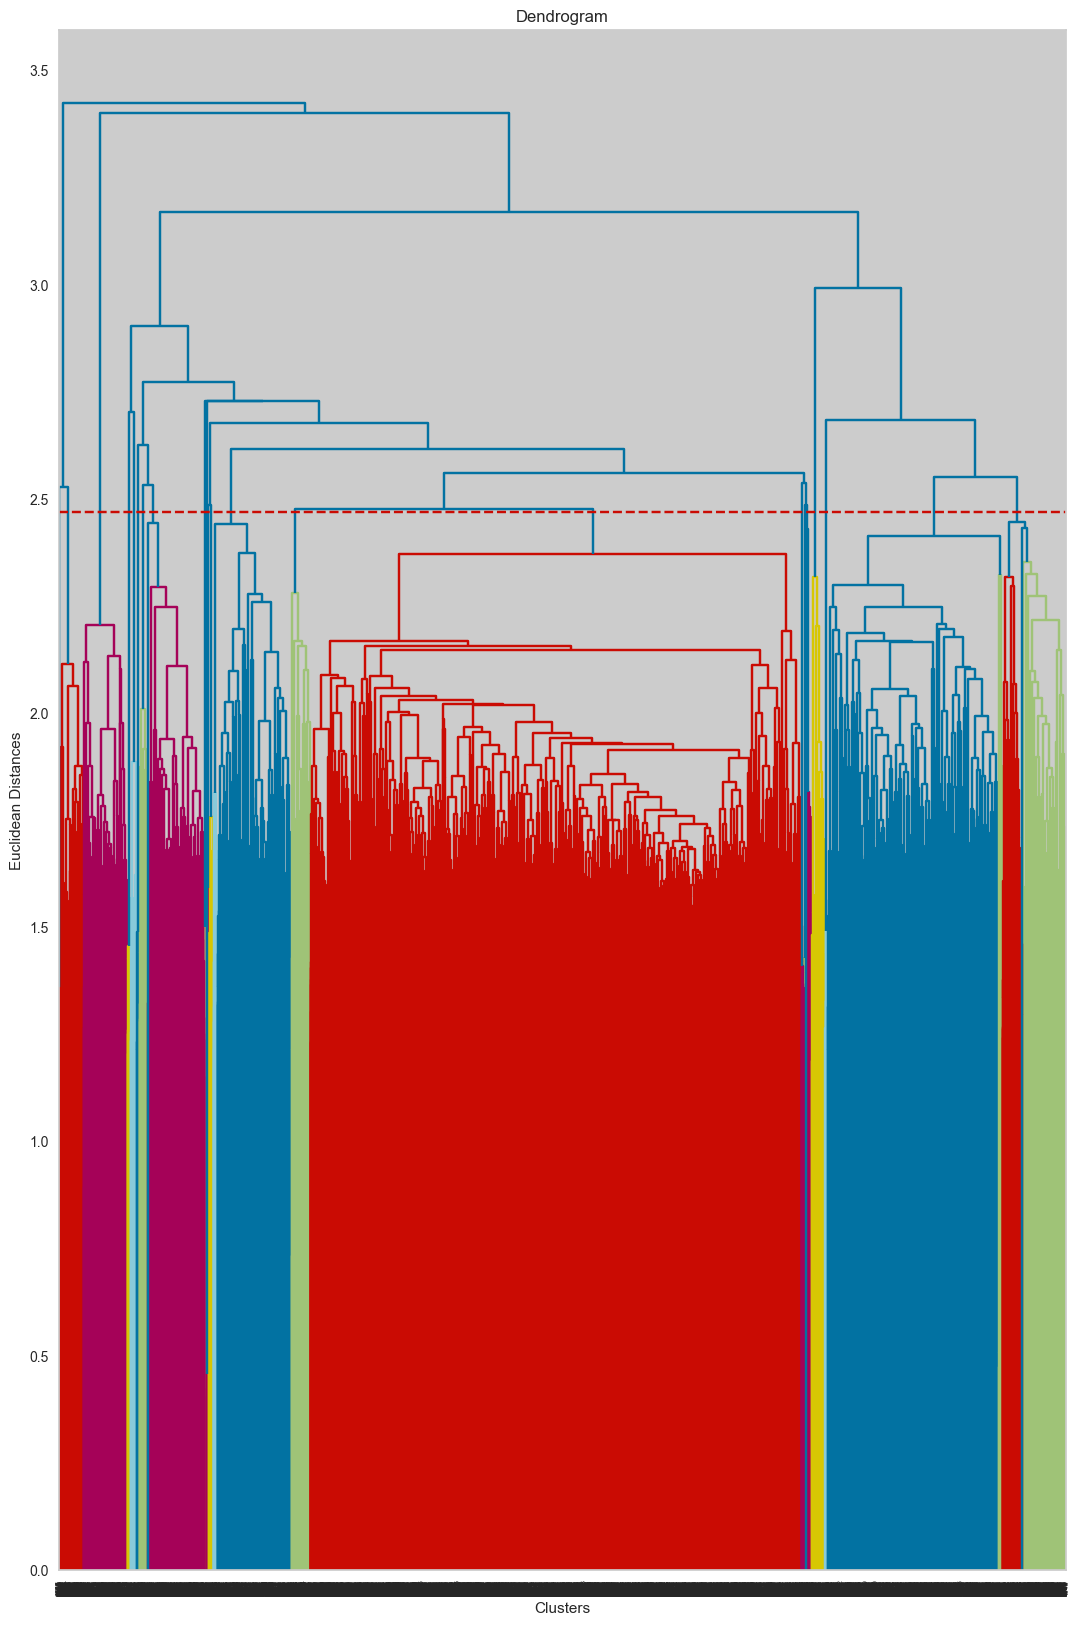

In [77]:
# Using the dendogram to find the optimal number of clusters

# Import necessary libraries
import scipy.cluster.hierarchy as sch

# Plotting dendogram
plt.figure(figsize=(13,20))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.axhline(y=2.47, color='r', linestyle='--')
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distances')
plt.show()

Silhouette Score Method


Finding optimal number of cluster using silhouette score method

Wrote only raw python code to finding the optimal number of cluster using the silhouette score method but it takes too long time to get optimal number of clusters, so we skiped it and considered the optimal number of clusters found using a dendogram.

Wrote only raw python code to finding the optimal number of cluster using the silhouette score method but it takes too long time to get optimal number of clusters, so we skiped it and considered the optimal number of clusters found using a dendogram.

The optimal number of clusters using the dendogram method is 19 and we choose number of clusters 19 found by using the dendogram method for building the model.

In [81]:
# Training the hierarchical clustering model on a dataset for number of clusters K=19

# Import dependancy
from sklearn.cluster import AgglomerativeClustering
# Fitting model
hc = AgglomerativeClustering(n_clusters = 19, metric = 'euclidean', linkage = 'ward', compute_distances=True)
hc.fit(X)

AgglomerativeClustering(compute_distances=True, n_clusters=19)

In [82]:
# Predict result
y_predict= hc.labels_
y_predict

array([3, 6, 3, ..., 6, 6, 1], dtype=int64)

In [88]:
### Evaluation of hierarchical clustering model
## Function to evaluate and visualize evaluation metrics of the hierarchical clustering model

# Import necessary dependancy
from tabulate import tabulate
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def hierarchical_clustering_eval(model, X , y_predict):
    """
    Evaluate a clustering model and print the results.

    Parameters:
    model (object): A clustering model object.
    X (array): The input data.
    y_predict: Prediction on model.

    Returns:
    Model evaluation result
    """

    # Calculate evaluation metrics
    print('~~'*45)
    print('Evaluation result :\n')
    silhouette = silhouette_score(X, y_predict)
    ch_score = calinski_harabasz_score(X, y_predict)
    db_score = davies_bouldin_score(X, y_predict)

    # Print the results
    print(f"Number of clusters: {len(set(y_predict))}")
    print(f"Silhouette score: {silhouette}")
    print(f"Calinski-Harabasz score: {ch_score}")
    print(f"Davies-Bouldin score: {db_score}")
    print('~~'*45)
    
    # Data 
    metrics = ['Silhouette score', 'Calinski-Harabasz score', 'Davies-Bouldin score']
    ev_result = [silhouette, ch_score, db_score]

    # Create a dataframe
    evaluation_df = pd.DataFrame({'Evaluation Metrics': metrics,
                   'Result': ev_result})
    # Print dataframe
    print(tabulate(evaluation_df, headers='keys', tablefmt='grid'))
    print('\n', '~~'*45, '\n')
    
    plt.figure(figsize=(7,7))
    ax=sns.barplot(x=evaluation_df['Evaluation Metrics'], y=evaluation_df['Result'])
    ax.bar_label(ax.containers[0])
    ax.set_title("Comparing Evaluation Metrics")
    ax.set_xlabel("Evaluation Metrics")
    ax.set_ylabel("Score")
    ax.legend(loc="best")

    # Show the plot
    plt.show()
    print('~~'*45)
    
    return {'Num_clusters':len(set(y_predict)),'silhouette':silhouette, 'ch_score':ch_score, 'db_score':db_score}


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Evaluation result :

Number of clusters: 19
Silhouette score: -0.003571682464628324
Calinski-Harabasz score: 3.9668002023655884
Davies-Bouldin score: 12.053942413604055
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
+----+-------------------------+-------------+
|    | Evaluation Metrics      |      Result |
+====+=========================+=============+
|  0 | Silhouette score        | -0.00357168 |
+----+-------------------------+-------------+
|  1 | Calinski-Harabasz score |  3.9668     |
+----+-------------------------+-------------+
|  2 | Davies-Bouldin score    | 12.0539     |
+----+-------------------------+-------------+

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



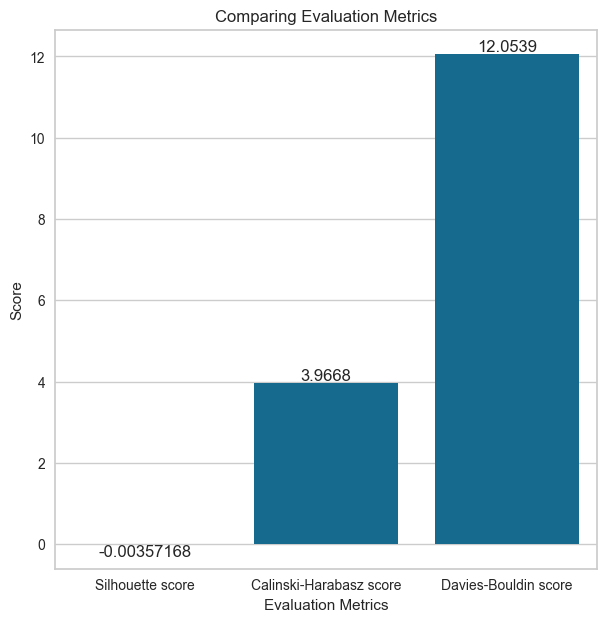

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [89]:
# Evaluation of Model
hc_eval=hierarchical_clustering_eval(hc, X, y_predict)

In [91]:
# Assigne Movies and TV Shows to its cluster
hc_df=df.copy()

# Droping non original features from dataset
hc_df.drop(columns={'description_len','contractions_description', 'punctuation_%', 'no_sw_pun_description',
                        'clean_description', 'tokenized_description', 'lemmatized_description',
                        'final_description', 'final_description_len'}, axis=1, inplace=True)

# Assigne Movies and TV Shows to its cluster
hc_df['cluster'] = hc.labels_


In [96]:
print(num_datapoint_in_clusters.columns)

Index(['cluster', 'count'], dtype='object')


Text(0, 0.5, 'Number of Movies / TV Shows')

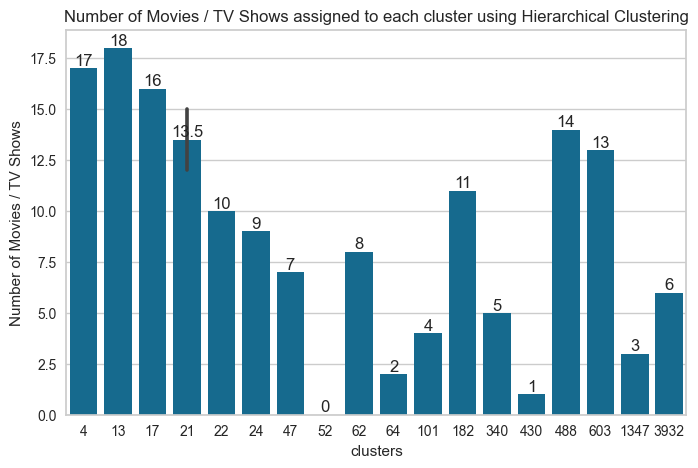

In [99]:
# Finding number of Movies / TV Shows assigned to each cluster

# Create dataframe for  number of movies/Tv shows in each cluster
num_datapoint_in_clusters=hc_df['cluster'].value_counts().reset_index()

# Plotting bar plot
plt.figure(figsize=(8,5))
ax=sns.barplot(x=num_datapoint_in_clusters['count'],
               y=num_datapoint_in_clusters['cluster'])
ax.bar_label(ax.containers[0])
ax.set_title("Number of Movies / TV Shows assigned to each cluster using Hierarchical Clustering")
ax.set_xlabel("clusters")
ax.set_ylabel("Number of Movies / TV Shows")

##  DBSCAN Clustering

In [93]:
# Training the DBSCAN model on a dataset

# Import dependancy
from sklearn.cluster import DBSCAN
# Fitting model
dbscan = DBSCAN(eps=0.0375, min_samples=3)
dbscan.fit(X)

DBSCAN(eps=0.0375, min_samples=3)

In [102]:
# Predict result
y_predict = dbscan.labels_
y_predict

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [103]:
### Evaluation of DBSCAN model
## Function to evaluate and visualize evaluation metrics of the DBSCAN model

# Import necessary dependancy
from tabulate import tabulate
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def dbscan_clustering_eval(model, X , y_predict):
    """
    Evaluate a clustering model and print the results.

    Parameters:
    model (object): A clustering model object.
    X (array): The input data.
    y_predict: Prediction on model.

    Returns:
    Model evaluation result
    """

    # Calculate evaluation metrics
    print('~~'*45)
    print('Evaluation result :\n')
    silhouette = silhouette_score(X, y_predict)
    ch_score = calinski_harabasz_score(X, y_predict)
    db_score = davies_bouldin_score(X, y_predict)

    # Print the results
    print(f"Number of clusters: {len(set(y_predict))}")
    print(f"Silhouette score: {silhouette}")
    print(f"Calinski-Harabasz score: {ch_score}")
    print(f"Davies-Bouldin score: {db_score}")
    print('~~'*45)
    
    # Data 
    metrics = ['Silhouette score', 'Calinski-Harabasz score', 'Davies-Bouldin score']
    ev_result = [silhouette, ch_score, db_score]

    # Create a dataframe
    evaluation_df = pd.DataFrame({'Evaluation Metrics': metrics,
                   'Result': ev_result})
    # Print dataframe
    print(tabulate(evaluation_df, headers='keys', tablefmt='grid'))
    print('\n', '~~'*45, '\n')
    
    plt.figure(figsize=(7,7))
    ax=sns.barplot(x=evaluation_df['Evaluation Metrics'], y=evaluation_df['Result'])
    ax.bar_label(ax.containers[0])
    ax.set_title("Comparing Evaluation Metrics")
    ax.set_xlabel("Evaluation Metrics")
    ax.set_ylabel("Score")
    ax.legend(loc="best")

    # Show the plot
    plt.show()
    print('~~'*45)
    
    return {'Num_clusters':len(set(y_predict)),'silhouette':silhouette, 'ch_score':ch_score, 'db_score':db_score}


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Evaluation result :

Number of clusters: 4
Silhouette score: -0.0037589731961213063
Calinski-Harabasz score: 3.003186300716702
Davies-Bouldin score: 1.0000736760095492
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
+----+-------------------------+-------------+
|    | Evaluation Metrics      |      Result |
+====+=========================+=============+
|  0 | Silhouette score        | -0.00375897 |
+----+-------------------------+-------------+
|  1 | Calinski-Harabasz score |  3.00319    |
+----+-------------------------+-------------+
|  2 | Davies-Bouldin score    |  1.00007    |
+----+-------------------------+-------------+

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



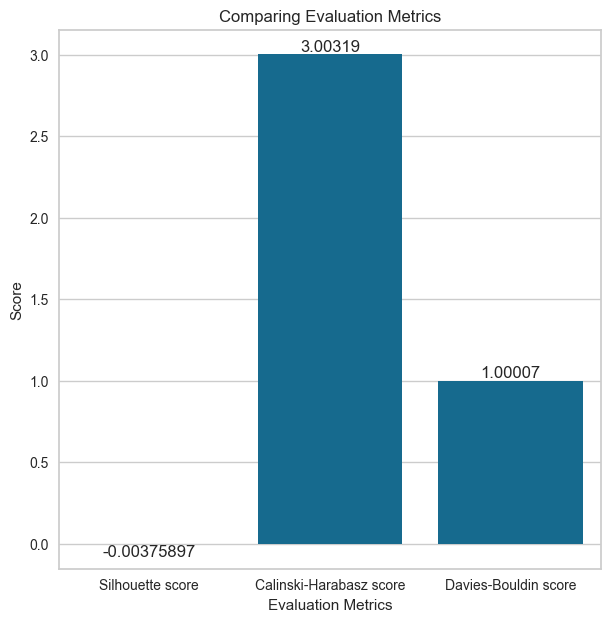

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [104]:
# Evaluation of Model
dbscan_eval=dbscan_clustering_eval(dbscan, X, y_predict)

In [105]:
# Assigne Movies and TV Shows to its cluster

# Copy dataset
dbscan_df=df.copy()

# Droping non original features from dataset
dbscan_df.drop(columns={'description_len','contractions_description', 'punctuation_%', 'no_sw_pun_description',
                        'clean_description', 'tokenized_description', 'lemmatized_description',
                        'final_description', 'final_description_len'}, axis=1, inplace=True)

# Assigne Movies and TV Shows to its cluster
dbscan_df['cluster'] = dbscan.labels_


Text(0, 0.5, 'Number of Movies / TV Shows')

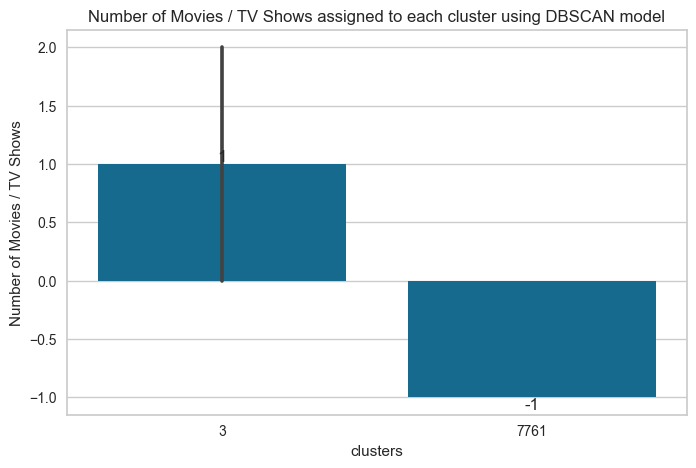

In [107]:
# Finding number of Movies / TV Shows assigned to each cluster

# Create dataframe for  number of movies/Tv shows in each cluster
num_datapoint_in_clusters=dbscan_df['cluster'].value_counts().reset_index()

# Plotting bar plot
plt.figure(figsize=(8,5))
ax=sns.barplot(x=num_datapoint_in_clusters['count'],y=num_datapoint_in_clusters['cluster'])
ax.bar_label(ax.containers[0])
ax.set_title("Number of Movies / TV Shows assigned to each cluster using DBSCAN model")
ax.set_xlabel("clusters")
ax.set_ylabel("Number of Movies / TV Shows")

Comparing Different Models based on the Evaluation Metrics

In [108]:
# Creating dataframe of performance metrics of all builded models

# Data
model=['K-Means Clustering','Hierarchical Clustering','DBSCAN Clustering']
silhouette_score=[Kmeans_eval['silhouette'],hc_eval['silhouette'],dbscan_eval['silhouette']]
calinski_harabasz_score=[Kmeans_eval['ch_score'],hc_eval['ch_score'],dbscan_eval['ch_score']]
davies_bouldin_score=[Kmeans_eval['db_score'],hc_eval['db_score'],dbscan_eval['db_score']]

# Create a dataframe
models_evaluation_df = pd.DataFrame({'model': model, 'silhouette_score': silhouette_score,
                                     'calinski_harabasz_score': calinski_harabasz_score,
                                     'davies_bouldin_score':davies_bouldin_score})
# Dataframe
models_evaluation_df

,model,silhouette_score,calinski_harabasz_score,davies_bouldin_score
0,K-Means Clustering,0.004121,8.138140,11.906442
1,Hierarchical Clustering,-0.003572,3.966800,12.053942
2,DBSCAN Clustering,-0.003759,3.003186,1.000074


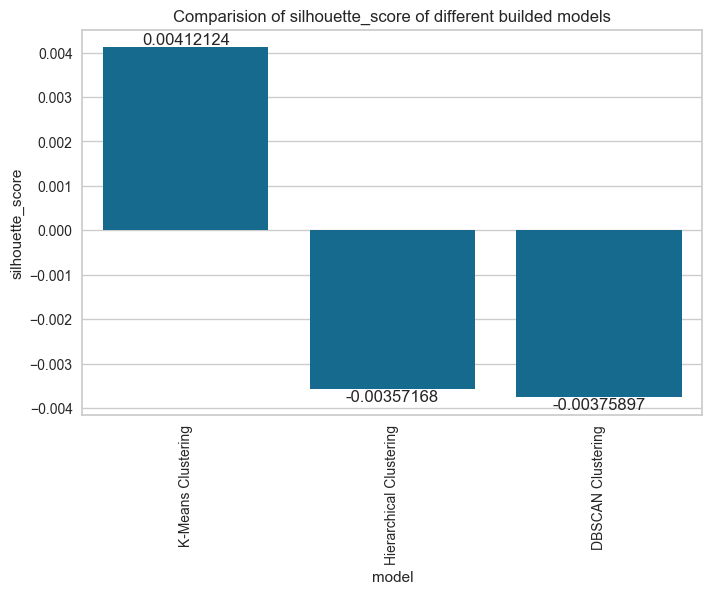

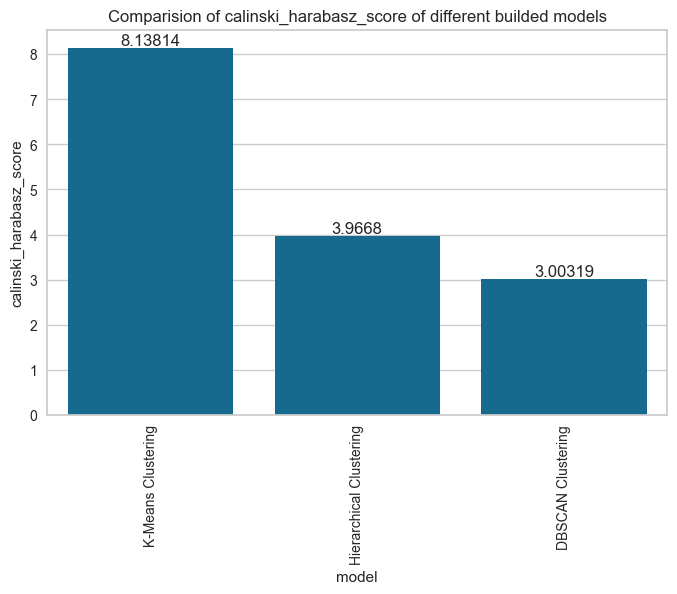

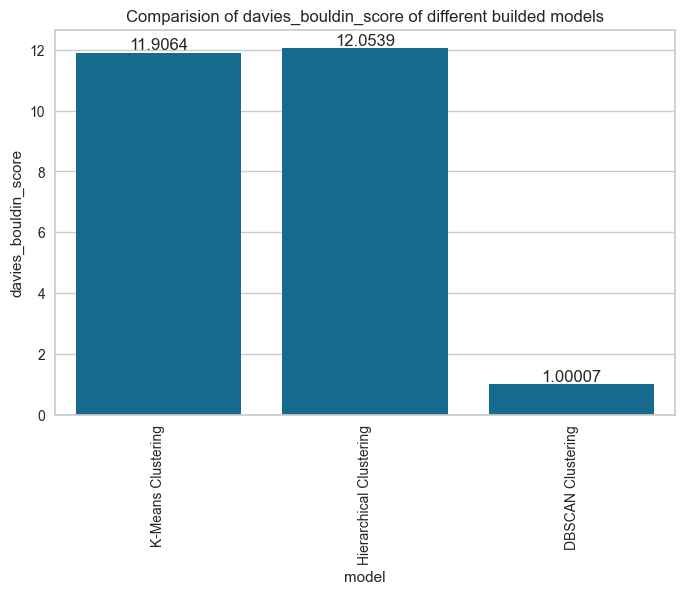

In [109]:
# Plotting bar plot to compare each evaluation metric for different models

# Defining target
col=[var for var in models_evaluation_df.columns if var not in ['model']]

for var in col:
    plt.figure(figsize=(8,5))
    ax=sns.barplot(x=models_evaluation_df['model'], y=models_evaluation_df[var])
    ax.set_title(f'Comparision of {var} of different builded models')
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=90)
    plt.show()